# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Abenojar, Joshua M. \
_Student No._: 2019-08669\
_Section_: 

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

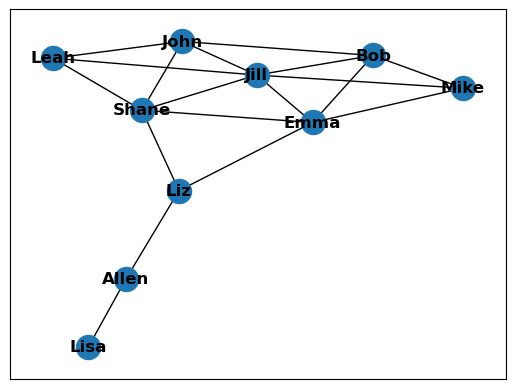

In [2]:
## Generate the Graph
#References:
# How to use networkx: https://networkx.org/documentation/stable/tutorial.html
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

Name_array=['Bob', 'Mike', 'Jill', 'Emma', 'John', 'Leah', 'Shane', 'Liz', 'Allen', 'Lisa']
G.add_nodes_from(Name_array)
G.add_edges_from([("Bob", "Mike"),("Bob","Emma"), ("Bob", "Jill"), ("Bob","John")])
G.add_edges_from([("Mike","Jill"),("Mike","Emma")])
G.add_edges_from([("Emma","Jill"),("Shane","Emma"),("Emma","Liz")])
G.add_edges_from([("Shane","Jill"),("Shane", 'John'),("Shane","Leah"),("Shane", "Liz")])
G.add_edges_from([("Leah","Jill"),("Leah", "John")])
G.add_edges_from([("John","Jill"),("John","Bob")])
G.add_edges_from([("Liz", "Allen"),("Allen", "Lisa")])
subax1 = plt.subplot(111)
nx.draw_networkx(G, with_labels=True, font_weight='bold')

Graph Diameter: 4
Potential edges: 45
Total number of edges: 18
Network Density: 40.0 %
Average degree: 3.6
[0. 1. 1. 3. 2. 2. 1. 0. 0.]


C:\Users\User\AppData\Local\Temp\ipykernel_6572\3412609951.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_axis)
C:\Users\User\AppData\Local\Temp\ipykernel_6572\3412609951.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(rawrwarwar)


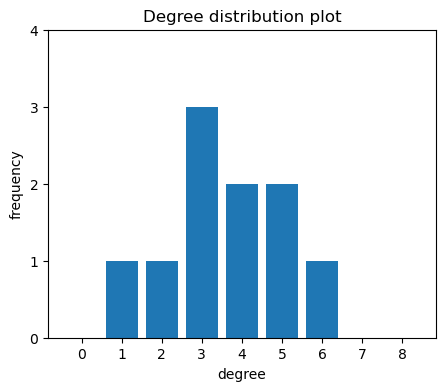

In [3]:
#References: 
# How to get network diameter: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html
# What is network density: https://www.the-vital-edge.com/knowledge-base/what-is-network-density/
# How to get degree: https://mathinsight.org/degree_distribution
# How to get degree using networkx: https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.DiGraph.degree.html
## Getting the diameter
DM=nx.diameter(G, e=None, usebounds=False, weight=None)
print("Graph Diameter:", DM)
## Getting the density
#Pontial connections:
N=G.number_of_nodes()
E=G.number_of_edges()
potential_edges = N*(N-1)/2
print("Potential edges:", int(potential_edges))
print("Total number of edges:", int(E))
print("Network Density:", E/potential_edges*100,"%")
## Getting the average degree
deg=0
for i in Name_array:
    deg=deg+G.degree(i)
avgdeg=deg/N
print("Average degree:", avgdeg)

## Degree distribution plot
x_axis=np.arange(0,N-1)
y_axis=np.zeros(N-1)

for i in Name_array:
    y_axis[int(G.degree(i))]=y_axis[int(G.degree(i))]+1
print(y_axis)

fig1,ax1 = plt.subplots(nrows=1, ncols=1,figsize=[5,4])
rawrwarwar=np.arange(0,5)
img1=ax1.bar(x_axis, y_axis)
ax1.set_title('Degree distribution plot')
ax1.set_xticklabels(x_axis)
ax1.set_yticklabels(rawrwarwar)
ax1.set_xlabel('degree')
ax1.set_ylabel('frequency')
ax1.set_xticks(x_axis)
ax1.set_yticks(rawrwarwar)

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [4]:
# References:
# Betweeness Centrality: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
# Closeness centrality: https://networkx.org/documentation/networkx-1.2/reference/generated/networkx.closeness_centrality.html
import pandas as pd
# Number of edges
edgenumber=[]
degcentrality=[]
BetweenCentrality=[]
closenessCentrality=[]
for i in Name_array:
    edgenumber.append(G.degree(i))
    degcentrality.append(G.degree(i)/(len(Name_array)-1))
    BetweenCentrality.append(nx.betweenness_centrality(G)[i])
    closenessCentrality.append(nx.closeness_centrality(G)[i])
# Degree centrality


list_of_tuples = list(zip(Name_array, edgenumber, degcentrality,BetweenCentrality, closenessCentrality))
columnnames=['Name','Edges', 'Degree Centrality','Betweenness Centrality','Closeness Centrality']
df = pd.DataFrame(list_of_tuples, columns=columnnames)
display(df)

,Name,Edges,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,Bob,4,0.444444,0.023148,0.529412
1,Mike,3,0.333333,0.000000,0.500000
2,Jill,6,0.666667,0.101852,0.600000
3,Emma,5,0.555556,0.231481,0.642857
4,John,4,0.444444,0.023148,0.529412
5,Leah,3,0.333333,0.000000,0.500000
6,Shane,5,0.555556,0.231481,0.642857
7,Liz,3,0.333333,0.388889,0.600000
8,Allen,2,0.222222,0.222222,0.428571
9,Lisa,1,0.111111,0.000000,0.310345


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

C:\Users\User\AppData\Local\Temp\ipykernel_6572\3409837350.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', max(partition.values()) + 1)


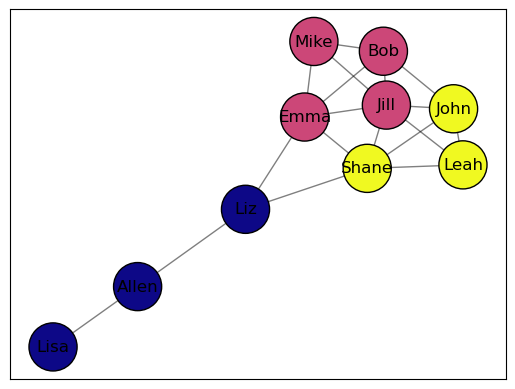

In [56]:
#References:
#add labels to draw_networkx_nodes: https://stackoverflow.com/questions/29687380/drawing-labels-in-networkx-graph
#Lovain Communities implementation: https://python-louvain.readthedocs.io/en/latest/api.html

nx.community.louvain_communities(G)
import matplotlib.cm as cm
import community as community_louvain
import networkx as nx

partition = community_louvain.best_partition(G, random_state=233)
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('plasma', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),node_size=1200,edgecolors='black', cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G,pos, font_size=12,font_family='sans-serif', font_color='black')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6572\174174710.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', max(partition.values()) + 1)


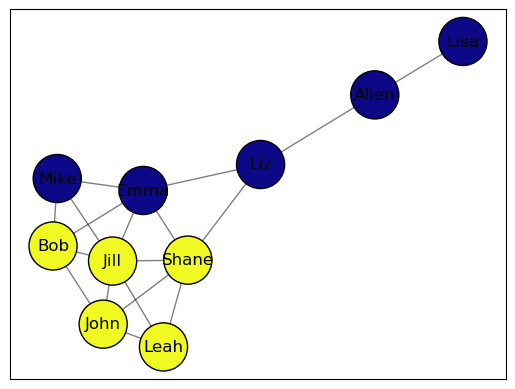

In [59]:
rawr = nx.community.kernighan_lin_bisection(G,seed=233)
# create new dictionary
mydict={}
# Add values na 0 at 1 sa names sa dictionary depende sa result ng kernighan lin bisection
for i in np.arange(len(rawr)):
    for ii in rawr[i]:
        mydict[ii]=i
partition=mydict

pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('plasma', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(),node_size=1200, cmap=cmap, node_color=list(partition.values()),edgecolors='black')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G,pos, font_size=12,font_family='sans-serif', font_color='black')
plt.show()